In [12]:
library(vbsr)
library(dplyr)
#library(mygene)
library(qvalue)
source('../R/regressionModel/regressionModel.R')

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13

Loading required package: grid
ComplexHeatmap version 1.17.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://bioconductor.org/packages/ComplexHeatmap/

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

Loading required package: viridisLite


In [2]:
Figueroa.HM27 <- read.csv('../data//Figueroa/CC/colMedian/clustering.tsv',
                          stringsAsFactor=F, sep='\t', header=F)

In [3]:
head(Figueroa.HM27)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V337,V338,V339,V340,V341,V342,V343,V344,V345,V346
GSM464771,GSM464772,GSM464773,GSM464774,GSM464775,GSM464776,GSM464777,GSM464778,GSM464779,GSM464780,⋯,GSM465026,GSM465030,GSM465060,GSM465061,GSM465062,GSM465063,GSM465064,GSM465065,cluster,NA
MSPI0406S00402708,-0.32092207871275,0.743733141105467,-1.5865591359232,1.43625353430553,-0.403119194477519,1.76512537175299,0.771862906363665,-0.276918696037406,0.715110196807598,⋯,0.541743223578491,-1.12994810632925,-0.645601860407265,-1.24212540684657,0.826853254125703,-0.589996546327176,-0.920917439708891,1.9426028586056,0.557630317169372,1
MSPI0406S00858517,0.35510998267822,0.342442886267891,0.901797310303404,0.849269646370808,-1.78605863095053,0.353445459168686,-0.420932039247313,0.364102807443931,1.09275398912269,⋯,-0.814226143742794,1.12767480975926,1.21794685064755,-0.884701843275764,0.978314241930521,0.908851289943553,1.44641120093399,1.33757407553741,-1.21934335468781,2
MSPI0406S00058122,1.82341908647707,2.13860323409867,-0.875514228380087,-0.930369592408027,-0.136587215211427,-1.10437613040977,0.425771163192204,1.49423791426902,-1.22116438444982,⋯,-0.517723956977592,-0.97857997637439,1.63105410601737,-0.321732084143182,-0.744277355030762,-0.53818877763905,-0.76192616890382,-0.668818241278354,-1.45490705506911,3
MSPI0406S00348562,-0.100487924106906,0.809498942884973,-0.117429770750269,-0.136675809771738,3.96791223220557,-0.335297402704949,1.28236745134083,-0.33657212272577,-0.428910274086382,⋯,-0.588926001134735,3.42512675844061,-1.07620368927135,-0.945523827853551,1.05925924152885,-0.695169051275796,-0.622947366098621,-0.279716380829555,-0.85089208601231,4
MSPI0406S00659741,1.10200359249762,0.739451224236296,-0.855929135347097,1.62629080253426,0.563257160174967,-0.0028086360940955,-1.37974969973017,-0.363035592431511,-0.809841739879802,⋯,0.938305158279437,0.803883041503241,0.0473386471078556,0.418030343927041,-1.20796202024131,-1.26466537940574,1.08220271709391,1.24814458363539,-1.02287265448583,5


In [4]:
HM27 <- data.matrix(Figueroa.HM27[-1,-1])

rownames(HM27) <- Figueroa.HM27[-1,1]
colnames(HM27) <- Figueroa.HM27[1,-dim(Figueroa.HM27)[2]]

head(HM27)

table(HM27[,dim(HM27)[2]]) # number of probes in each cluster

,GSM464771,GSM464772,GSM464773,GSM464774,GSM464775,GSM464776,GSM464777,GSM464778,GSM464779,GSM464780,⋯,GSM465024,GSM465026,GSM465030,GSM465060,GSM465061,GSM465062,GSM465063,GSM465064,GSM465065,cluster
MSPI0406S00402708,-0.3209221,0.7437331,-1.5865591,1.43625353,-0.4031192,1.765125372,0.7718629,-0.2769187,0.7151102,1.0123317,⋯,0.54174322,-1.1299481,-0.64560186,-1.2421254,0.8268533,-0.5899965,-0.9209174,1.9426029,0.5576303,1
MSPI0406S00858517,0.3551100,0.3424429,0.9017973,0.84926965,-1.7860586,0.353445459,-0.4209320,0.3641028,1.0927540,-0.9108578,⋯,-0.81422614,1.1276748,1.21794685,-0.8847018,0.9783142,0.9088513,1.4464112,1.3375741,-1.2193434,2
MSPI0406S00058122,1.8234191,2.1386032,-0.8755142,-0.93036959,-0.1365872,-1.104376130,0.4257712,1.4942379,-1.2211644,-1.0183642,⋯,-0.51772396,-0.9785800,1.63105411,-0.3217321,-0.7442774,-0.5381888,-0.7619262,-0.6688182,-1.4549071,3
MSPI0406S00348562,-0.1004879,0.8094989,-0.1174298,-0.13667581,3.9679122,-0.335297403,1.2823675,-0.3365721,-0.4289103,-0.1761355,⋯,-0.58892600,3.4251268,-1.07620369,-0.9455238,1.0592592,-0.6951691,-0.6229474,-0.2797164,-0.8508921,4
MSPI0406S00659741,1.1020036,0.7394512,-0.8559291,1.62629080,0.5632572,-0.002808636,-1.3797497,-0.3630356,-0.8098417,1.0629036,⋯,0.93830516,0.8038830,0.04733865,0.4180303,-1.2079620,-1.2646654,1.0822027,1.2481446,-1.0228727,5
MSPI0406S00505093,-0.2802714,1.5679925,-0.4480782,-0.08721108,-0.5202001,-1.066512938,1.8082233,-0.8247764,1.6403075,0.1204026,⋯,0.08429282,-0.5340413,1.89371705,-0.8092779,-0.8797858,-0.6311369,1.2633502,-0.5002683,-1.0485098,6



  1   2   3   4   5   6   7 
326 290 671 525 816 656 461 

In [5]:
findClusterIdx <- function(i) {
    n <- dim(HM27)[2]
    which(HM27[,n] == i)
}

computeAverage <- function(idx) {
    n <- dim(HM27)[2]
    cluster.probes <- HM27[idx, -n]
    cbind(apply(cluster.probes, 2, mean), apply(cluster.probes, 2, sd))
}

# preprocessing RNAseq data

In [6]:
# load the RNAseq data
rnaseq.raw <- read.csv('../data/Figueroa/rnaseq.tsv', sep='\t', stringsAsFactor=F, header=F)

rnaseq <- data.matrix(rnaseq.raw[-1, -1])
colnames(rnaseq) <- rnaseq.raw[1, -dim(rnaseq.raw)[2]]
rownames(rnaseq) <- rnaseq.raw[-1, 1]

In [7]:
head(rnaseq)  # predictors

,GSM464771,GSM464772,GSM464773,GSM464774,GSM464775,GSM464776,GSM464777,GSM464778,GSM464779,GSM464780,⋯,GSM465020,GSM465024,GSM465026,GSM465030,GSM465060,GSM465061,GSM465062,GSM465063,GSM465064,GSM465065
MED6,660.56974,536.18860,314.06915,856.60955,708.81936,433.50528,528.43526,448.2595,543.2180,707.80086,⋯,406.98144,586.14302,410.51695,486.99356,547.82721,587.26037,549.84944,398.54022,457.63892,384.29063
NR2E3,84.34185,56.78113,45.26591,174.51750,70.79560,82.05186,73.81927,142.9044,122.1829,144.36776,⋯,75.13807,71.23044,25.49023,54.55764,49.45993,113.59767,52.31265,83.31183,34.09275,52.96940
ZBTB33,1060.79305,596.17613,443.87567,1190.02471,1261.04240,695.02429,994.92703,725.0389,806.3498,846.59995,⋯,939.38803,1238.60655,638.92057,990.12739,649.39378,1186.24832,996.09131,941.10275,928.10878,779.57045
SRA1,197.67505,69.23700,435.99979,332.36297,77.25411,418.57888,225.90877,194.9194,166.0588,442.73545,⋯,102.28652,203.92157,981.19022,514.58452,474.32831,367.67276,242.61262,729.51343,496.60389,764.26749
ZBTB42,90.91652,200.74195,38.22230,39.48965,65.72948,125.12272,84.36747,332.5280,101.5288,51.93689,⋯,170.28814,132.65723,172.23979,17.54705,32.44631,44.31777,114.34563,51.93390,97.79446,49.13489
ZNF316,604.98337,700.86450,605.96999,749.42574,775.11273,391.61254,399.32609,285.5689,597.9074,628.15264,⋯,437.72630,341.85076,442.54547,227.47432,256.29757,327.74557,326.22713,403.71416,304.94500,160.36429


In [14]:
# select 75 % / 25 % split
set.seed(1)
train.idx <- sample(colnames(rnaseq), round(dim(rnaseq)[2] * 0.75, 0))

In [15]:
rnaseq.train <- rnaseq[, colnames(rnaseq) %in% train.idx]
head(rnaseq.train)

,GSM464773,GSM464775,GSM464776,GSM464777,GSM464778,GSM464780,GSM464782,GSM464783,GSM464785,GSM464786,⋯,GSM465018,GSM465020,GSM465026,GSM465030,GSM465060,GSM465061,GSM465062,GSM465063,GSM465064,GSM465065
MED6,314.06915,708.81936,433.50528,528.43526,448.2595,707.80086,390.93539,583.73585,485.09371,557.23345,⋯,663.7018,406.98144,410.51695,486.99356,547.82721,587.26037,549.84944,398.54022,457.63892,384.29063
NR2E3,45.26591,70.79560,82.05186,73.81927,142.9044,144.36776,147.63098,58.35535,121.46022,26.42119,⋯,120.5210,75.13807,25.49023,54.55764,49.45993,113.59767,52.31265,83.31183,34.09275,52.96940
ZBTB33,443.87567,1261.04240,695.02429,994.92703,725.0389,846.59995,799.68814,465.31635,1029.61134,679.22289,⋯,1688.5188,939.38803,638.92057,990.12739,649.39378,1186.24832,996.09131,941.10275,928.10878,779.57045
SRA1,435.99979,77.25411,418.57888,225.90877,194.9194,442.73545,515.37131,332.79541,281.74512,299.49957,⋯,248.9309,102.28652,981.19022,514.58452,474.32831,367.67276,242.61262,729.51343,496.60389,764.26749
ZBTB42,38.22230,65.72948,125.12272,84.36747,332.5280,51.93689,40.49612,49.61360,32.14633,48.93074,⋯,200.7763,170.28814,172.23979,17.54705,32.44631,44.31777,114.34563,51.93390,97.79446,49.13489
ZNF316,605.96999,775.11273,391.61254,399.32609,285.5689,628.15264,649.00390,358.92582,433.05480,490.98227,⋯,464.7682,437.72630,442.54547,227.47432,256.29757,327.74557,326.22713,403.71416,304.94500,160.36429


In [8]:
findIdx <- function(gene) {
    which(rownames(rnaseq) %in% gene)
}
FindIdx <- Vectorize(findIdx)

In [9]:
n <- dim(HM27)[2]
plotCluster <- function(i) {
    set.seed(1)
    idx <- findClusterIdx(i)
    cluster.probes <- HM27[idx, -n]
    cluster.mean <- computeAverage(findClusterIdx(i))
    model.fit <- vbsr(y=cluster.mean, X=t(rnaseq), family='normal', eps=5e-15, n_orderings=15, maxit=10^4, estimation_type="MAXIMAL", post=0.95) 
    p.val <- model.fit$pval
    significant.idx <- qvalue(p.val, fdr.level=0.05)$significant
    coef.names <- rownames(rnaseq.train)[significant.idx]
    coef.significant <- model.fit$beta[significant.idx]
    res1 <- data.frame(gene=coef.names, coef=coef.significant)
    print(res1)
    ModuleHeatmap(t(cluster.probes), cluster.mean[,1], t(rnaseq[as.numeric(FindIdx(res1$gene)), ]), center=T, scale=T, coef=sign(res1$coef))
}

    gene          coef
1  ERBB2  0.0018565636
2 ZBTB38 -0.0006267143
3  HDAC2  0.0007275236
4   RBPJ -0.0001837189
5 POU6F1  0.0025278644
6   RRM2  0.0001387126
7  CDCA7 -0.0001423020


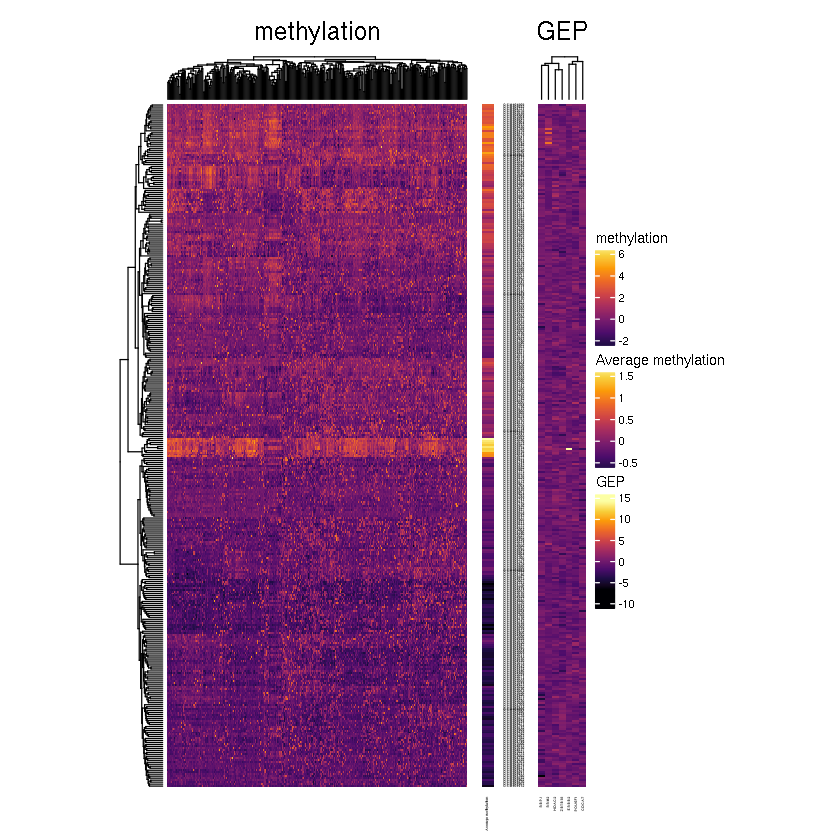

In [16]:
plotCluster(1)

    gene          coef
1 ZNF383  0.0015731666
2   UTP3 -0.0003240072
3  NPAS3  0.0034408118
4   ZXDC -0.0005353293


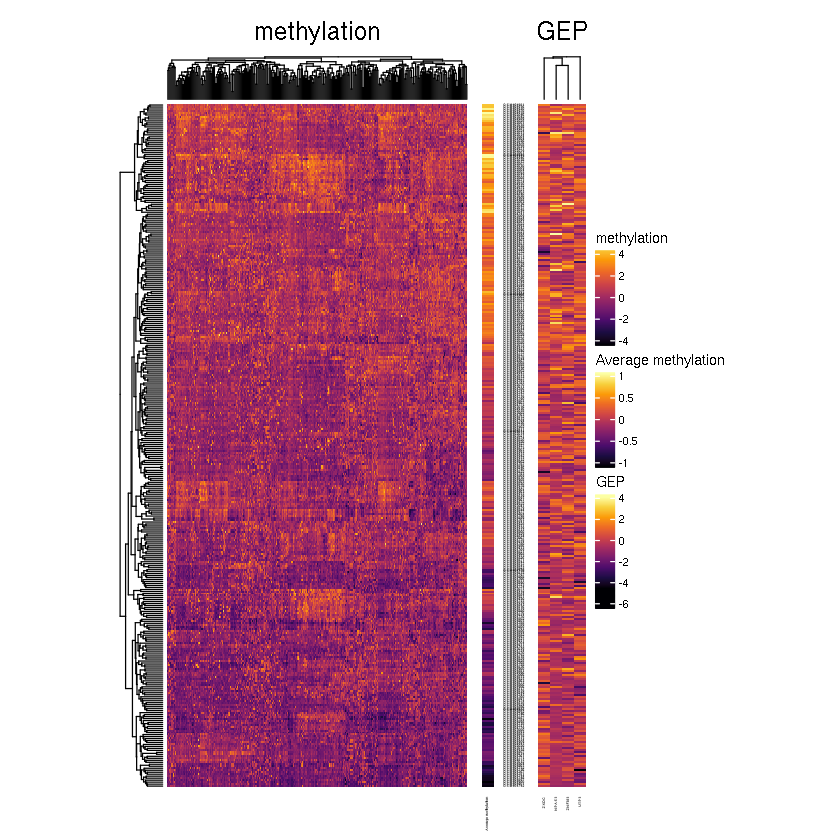

In [17]:
plotCluster(2)

      gene          coef
1   CAMKK2  3.749869e-04
2   NKX2-5 -9.880399e-04
3   DNMT3A  4.384437e-04
4   MED13L -1.882851e-04
5     TBK1  1.404667e-04
6      LEP  8.257955e-04
7     MGMT  6.527091e-04
8    THAP4  4.539635e-04
9    SOX15  8.777811e-04
10 ABHD14B -8.942333e-05


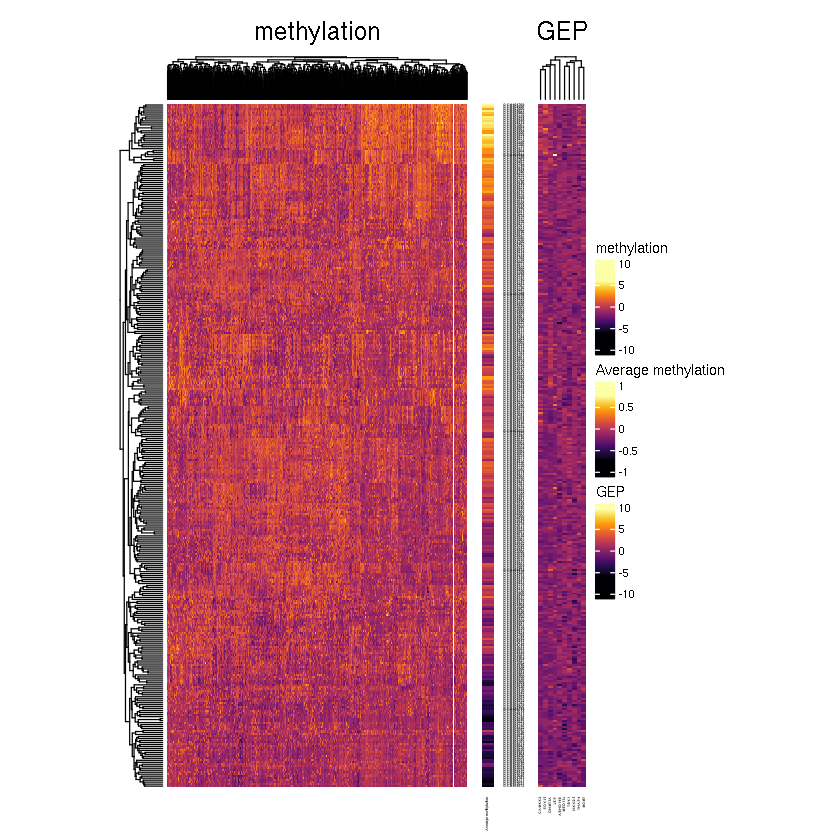

In [18]:
plotCluster(3)

    gene          coef
1  PRAME  6.703140e-05
2  SSU72 -2.118452e-04
3    JUP -7.816144e-05
4  PCBD1  3.542767e-04
5 ZNF704 -1.336988e-03
6  PIAS1 -1.670727e-04
7   CD81  3.111099e-05


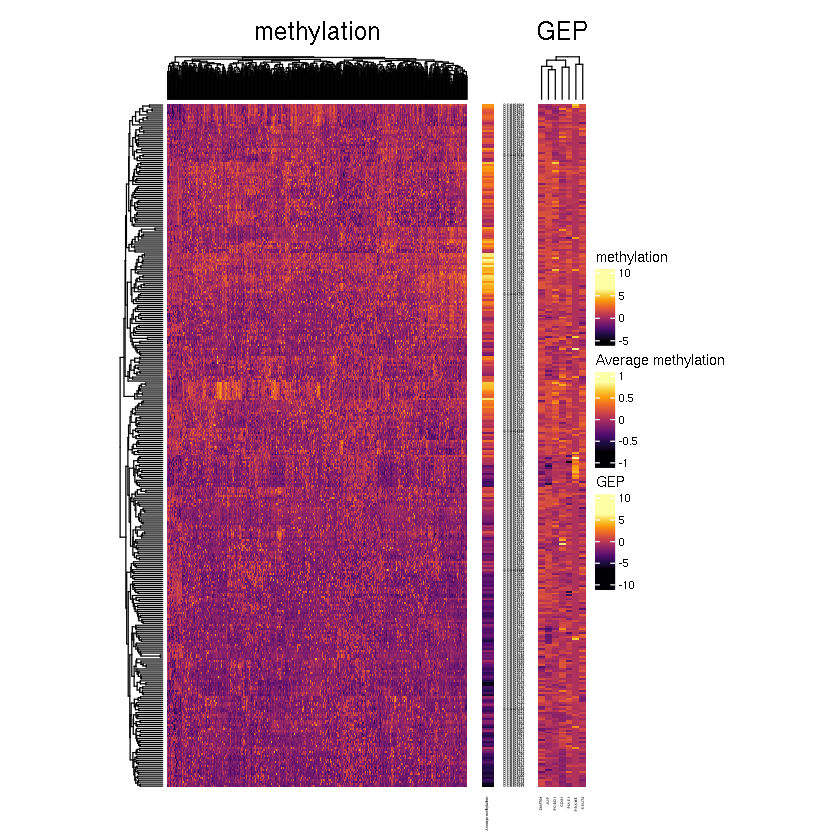

In [19]:
plotCluster(4)

   gene          coef
1  TLR6  0.0011828533
2 SSU72  0.0002276507
3 BCL7A  0.0002546875
4  SARS -0.0002969255


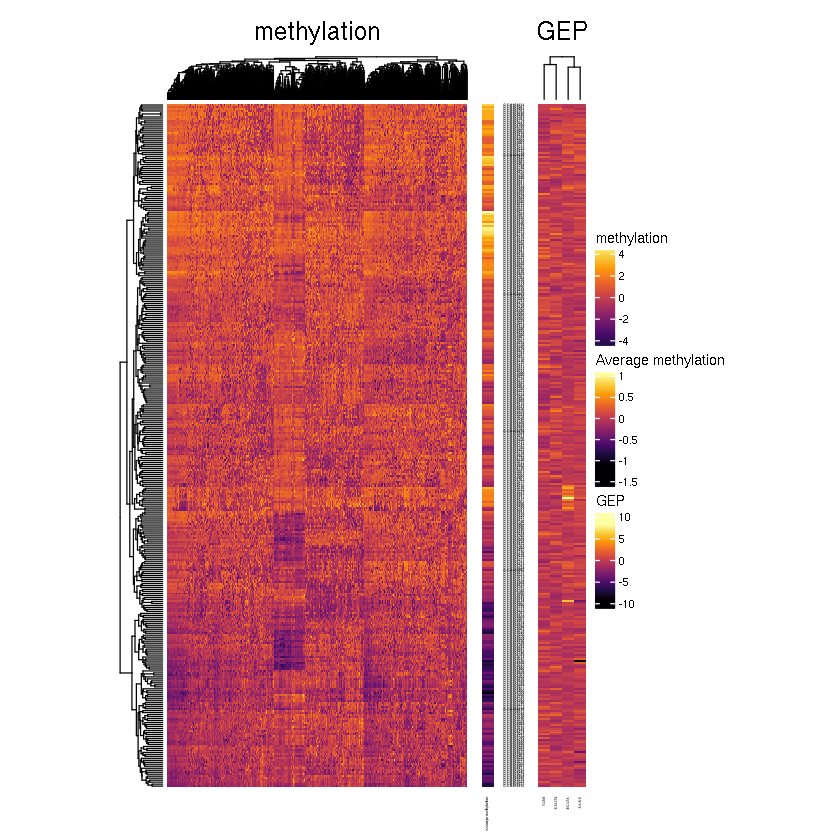

In [20]:
plotCluster(5)

    gene          coef
1  DEAF1  1.744139e-04
2 ATF7IP -1.419047e-04
3  PSEN1 -1.726099e-04
4 CREBZF  4.919421e-04
5   RBL2  2.769709e-04
6  VLDLR -9.520951e-05
7  ZC3H8 -5.125154e-04


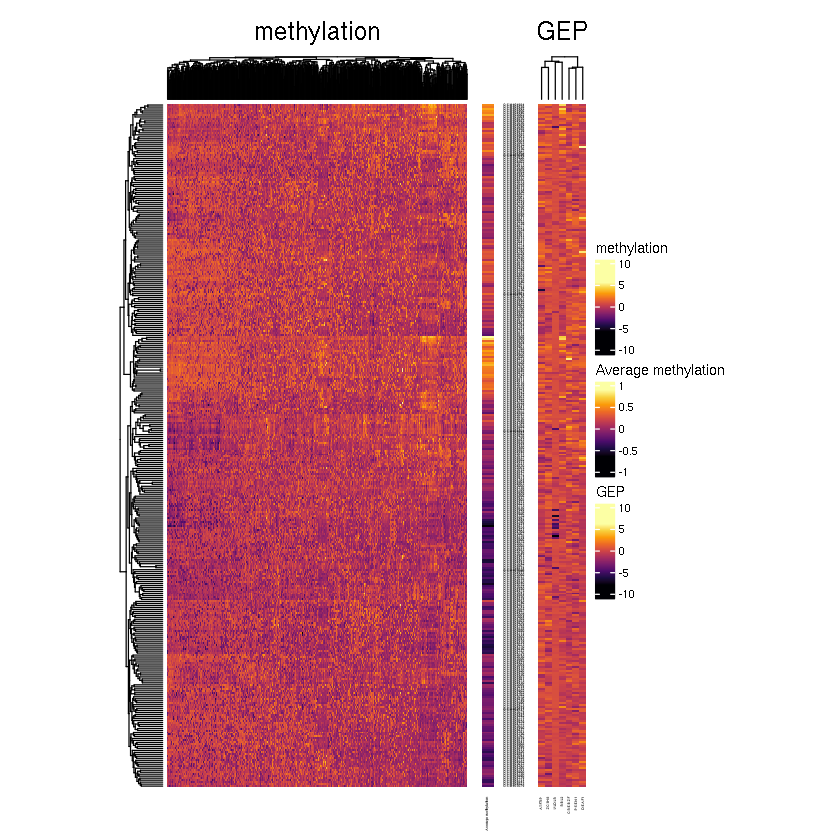

In [21]:
plotCluster(6)

     gene          coef
1  MAMLD1 -1.102477e-03
2    CHD3 -2.258761e-04
3    GFI1  1.550309e-04
4    GLO1 -1.056808e-04
5    ZIK1 -1.009341e-03
6   SSU72 -2.229632e-04
7    HNMT  6.228109e-04
8   HOXB3  9.465902e-05
9   PCF11 -3.847976e-04
10  ZBED5 -3.037228e-04


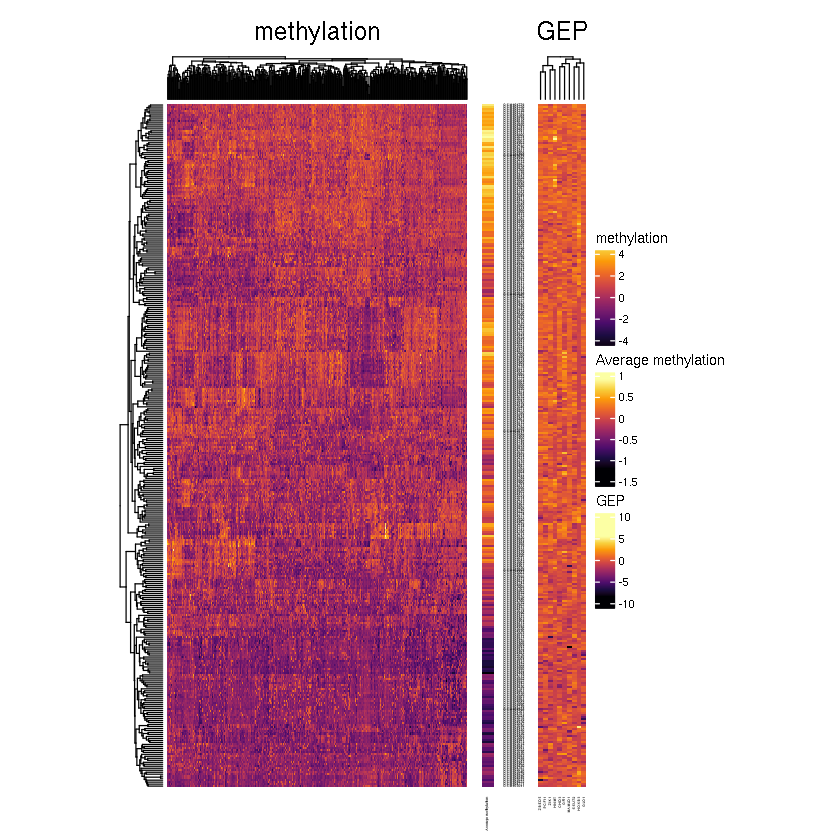

In [22]:
plotCluster(7)